In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
from shapely.geometry import Point

sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

from load_lakes import gdf

In [3]:
lake_names = ['MercerSubglacialLake','Mac1','Byrd_s10','Cook_E2']
latex_names = [r'Mercer Subglacial Lake',r'Mac1',r'Byrd$_{\mathrm{s}10}$',r'Cook$_{\mathrm{E}2}$']
colors = ['royalblue','indianred','blueviolet','forestgreen']
alphab = [r'(a)',r'(b)',r'(c)',r'(d)']

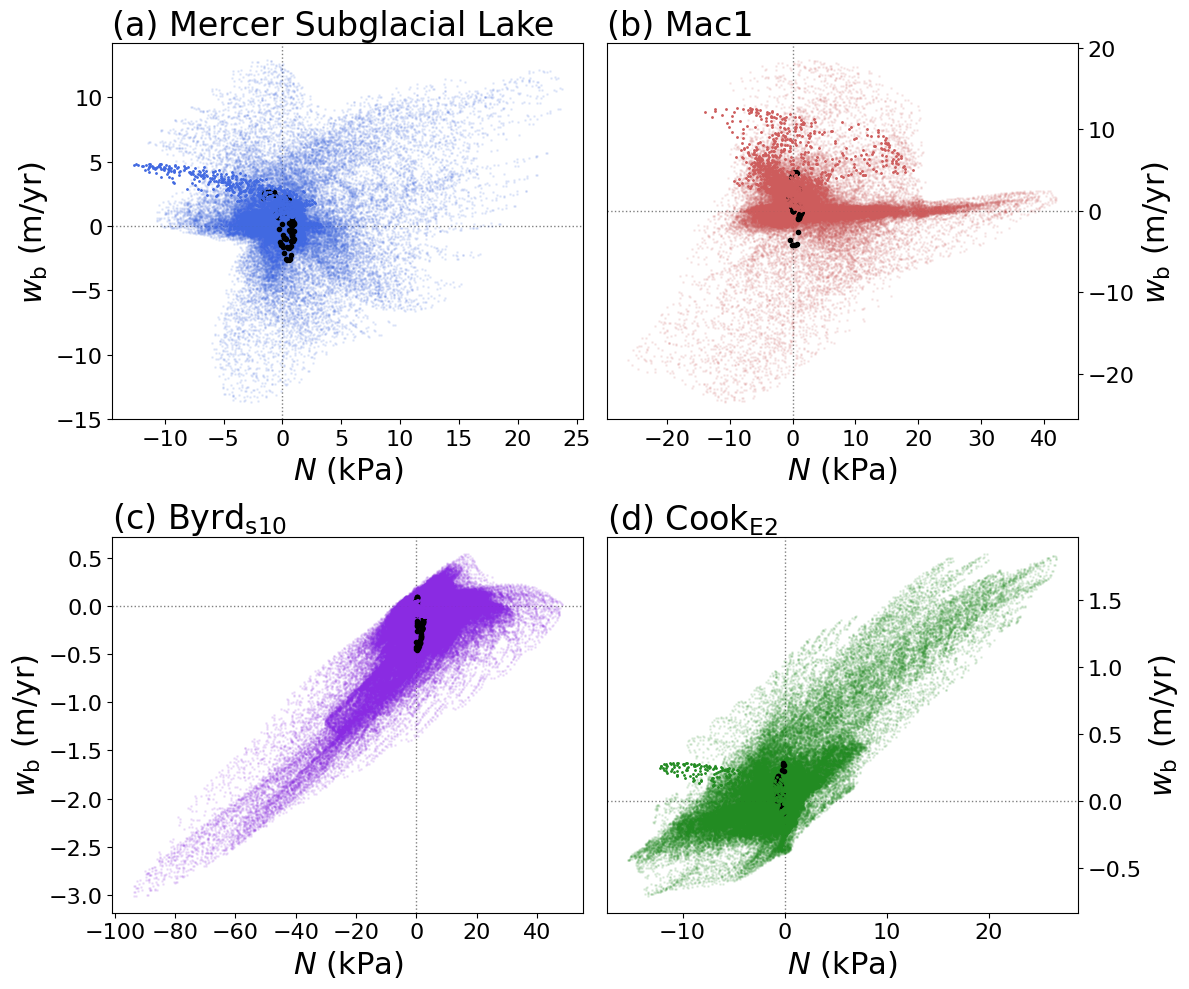

In [5]:
l = 0
j0 = 0
fig = plt.figure(figsize=(12,10))
for lake_name in lake_names:
    plt.subplot(2,2,l+1)
    plt.title(alphab[l]+r' '+latex_names[l],fontsize=24,loc='left')

    if l ==1 or l==3:
        plt.gca().yaxis.set_label_position("right")
        plt.gca().yaxis.tick_right() 

    plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
    plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)

    dir_name = '../results/IS2_N_'+lake_name
    N = np.load(dir_name+'/N.npy')
    w = np.load(dir_name+'/w.npy')

    N_mean = np.load(dir_name+'/N_mean.npy')
    w_mean = np.load(dir_name+'/w_mean.npy')
    bdry = np.load(dir_name+'/bdry.npy')

    data_dir = '../data/data_'+lake_name
    x_d = np.load(data_dir+'/x_d.npy')
    y_d = np.load(data_dir+'/y_d.npy')

    t0 = np.load(data_dir+'/t.npy')
    x0 = np.load(data_dir+'/x.npy')
    y0 = np.load(data_dir+'/y.npy')
    t,y,x = np.meshgrid(t0,y0,x0,indexing='ij')
  
    N_sc = 917*9.81

    for i in np.arange(j0,t0.size,1): 
        plt.plot(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),'o',color=colors[l],markersize=1,alpha=0.1)

    plt.plot(N_mean[j0:None].flatten()*N_sc/1e3,w_mean[j0:None].flatten(),'ko',markersize=3,alpha=1)
    plt.plot(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),'o',color=colors[l],markersize=1,alpha=1,label=latex_names[l])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)



   
    plt.xlabel(r'$N$ (kPa)',fontsize=22)
    plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=22)
    # plt.ylabel(r'$h$ (m)',fontsize=22)
    l+=1

plt.tight_layout()
plt.savefig('fig8')
plt.show()
plt.close()

In [10]:
# plt.contour(x_d,y_d,bdry,levels=[1e-2],colors='k',linewidths=2)
# plt.show()
# plt.close()